## Studi Analisis Empiris dan PCA terhadap Dataset Penyakit Kronis Menggunakan KNN

Studi ini bertujuan untuk:
1. Menganalisis dataset penyakit kronis secara empiris.
2. Menerapkan Principal Component Analysis (PCA) untuk mereduksi dimensi data.
3. Membandingkan performa model K-Nearest Neighbors (KNN) sebelum dan sesudah PCA.

Menggunakan dataset berisi informasi pasien dengan fitur Usia, Jenis Kelamin, Tekanan Darah, BMI, Gula Darah, Kolesterol, Merokok, Riwayat Keluarga, dan target Penyakit Kronis (Multi-kelas)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [74]:
# Muat data
data = pd.read_excel("dataset_penyakit_kronis.xlsx")

In [ ]:
# Fungsi untuk membersihkan BMI
def clean_bmi(value):
    try:
        return float(value)
    except:
        return np.nan

data['BMI'] = data['BMI'].apply(clean_bmi)
data = data.dropna(subset=['BMI'])

In [ ]:
# Encoding kolom kategorikal
le = LabelEncoder()
data['Jenis_Kelamin'] = le.fit_transform(data['Jenis_Kelamin'])
data['Merokok'] = le.fit_transform(data['Merokok'])
data['Riwayat_Keluarga'] = le.fit_transform(data['Riwayat_Keluarga'])
y = le.fit_transform(data['Penyakit_Kronis'])

In [ ]:
# 1. Memuat dan mempersiapkan data
# data = pd.read_excel("dataset_penyakit_kronis.xlsx")
# print("Missing Values:\n", data.isnull().sum())

In [98]:
# Deteksi outlier dengan Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X) == -1
print(f"Jumlah Outlier: {outliers.sum()}")

Jumlah Outlier: 220


In [ ]:
# Hapus outlier
X = X[~outliers]
y = y[~outliers]

Jumlah Sampel setelah Pembersihan Outlier: 3943


In [ ]:
# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

/tmp/ipykernel_38071/2894111950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean[numerical_cols] = scaler.fit_transform(X_clean[numerical_cols])


In [ ]:
# Seleksi fitur dengan mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=7)  # Pilih 7 fitur
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Fitur Terpilih: {selected_features.tolist()}")

Fitur Terpilih: ['Usia', 'Tekanan_Darah_Sistolik', 'BMI', 'Gula_Darah_Puasa', 'Kolesterol_Total', 'Merokok', 'Riwayat_Keluarga']


In [ ]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (KNN dengan PCA dan SMOTE)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

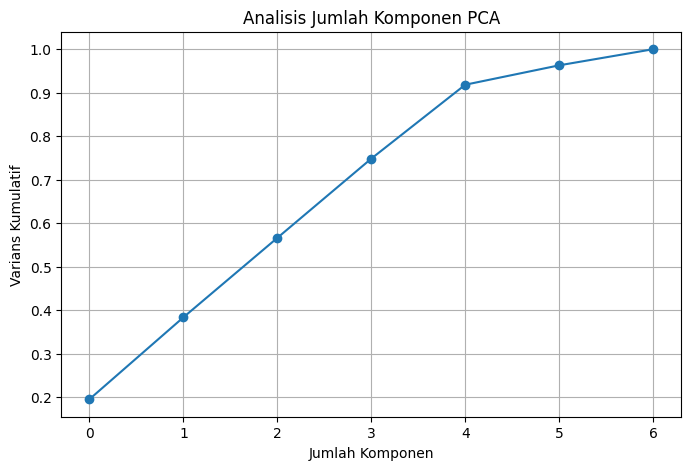

In [ ]:
# Plot varians kumulatif
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Varians Kumulatif')
plt.title('Analisis Jumlah Komponen PCA')
plt.grid(True)
plt.show()

In [ ]:
# Oversampling dengan ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_pca, y)

Oversampling dengan SMOTE berhasil.


In [ ]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (KNN dengan PCA dan SMOTE)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# Plot varians kumulatif
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Varians Kumulatif')
plt.title('Analisis Jumlah Komponen PCA')
plt.grid(True)
plt.show()

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [ ]:

print("=== Laporan Klasifikasi ===")
print(classification_report(y_test, y_pred))

Parameter Terbaik: {'metric': 'chebyshev', 'n_neighbors': 4, 'weights': 'distance'}


=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

           0       0.17      0.17      0.17        80
           1       0.16      0.17      0.17        80
           2       0.13      0.12      0.13        80
           3       0.09      0.10      0.09        81
           4       0.12      0.12      0.12        81
           5       0.08      0.07      0.08        80
           6       0.14      0.14      0.14        81
           7       0.12      0.12      0.12        80
           8       0.14      0.14      0.14        80
           9       0.09      0.07      0.08        81

    accuracy                           0.12       804
   macro avg       0.12      0.12      0.12       804
weighted avg       0.12      0.12      0.12       804



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [55]:
# Tampilkan parameter terbaik
print(f"Parameter Terbaik: {grid_search.best_params_}")

Parameter Terbaik: {'metric': 'chebyshev', 'n_neighbors': 1, 'weights': 'uniform'}


In [56]:
# Prediksi dan evaluasi
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("=== Laporan Klasifikasi ===")
print(classification_report(y_test, y_pred))

=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

           0       0.15      0.17      0.16        90
           1       0.16      0.16      0.16        90
           2       0.14      0.14      0.14        90
           3       0.15      0.16      0.16        91
           4       0.12      0.12      0.12        91
           5       0.14      0.12      0.13        90
           6       0.18      0.20      0.19        91
           7       0.17      0.14      0.16        90
           8       0.09      0.08      0.08        90
           9       0.15      0.16      0.16        91

    accuracy                           0.15       904
   macro avg       0.15      0.15      0.15       904
weighted avg       0.15      0.15      0.15       904



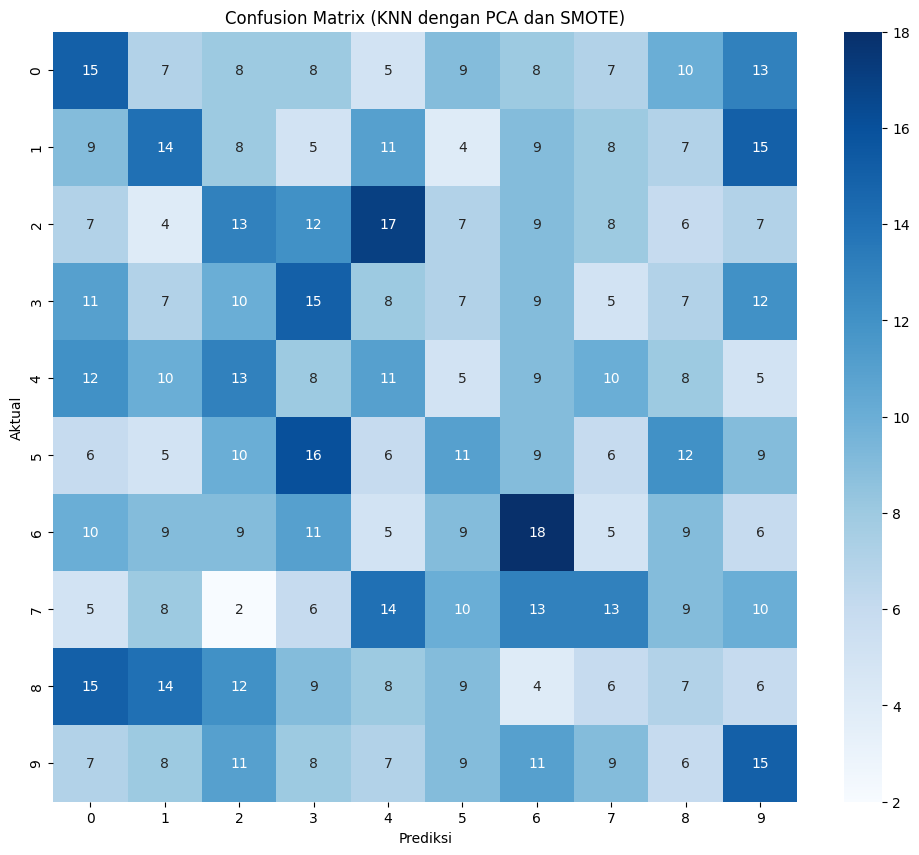

In [57]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (KNN dengan PCA dan SMOTE)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [58]:
# Validasi silang
cv_scores = cross_val_score(best_knn, X_res, y_res, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted')
print(f"Validasi Silang (F1-Score): {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

Validasi Silang (F1-Score): 0.14 ± 0.03


In [ ]:
# 1. Memuat dan mempersiapkan data
# data = pd.read_excel("dataset_penyakit_kronis.xlsx")
# print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Usia                       0
Jenis_Kelamin              0
Tekanan_Darah_Sistolik     0
Tekanan_Darah_Diastolik    0
BMI                        0
Gula_Darah_Puasa           0
Kolesterol_Total           0
Merokok                    0
Riwayat_Keluarga           0
Penyakit_Kronis            0
dtype: int64


In [ ]:
# def clean_bmi(value):
#     try:
#         return float(value)
#     except:
#         return np.nan

# data['BMI'] = data['BMI'].apply(clean_bmi)

In [ ]:
# X = data.drop('Penyakit_Kronis', axis=1)
# y = data['Penyakit_Kronis']

In [ ]:
# le = LabelEncoder()
# X['Jenis_Kelamin'] = le.fit_transform(X['Jenis_Kelamin'])
# X['Merokok'] = le.fit_transform(X['Merokok'])
# X['Riwayat_Keluarga'] = le.fit_transform(X['Riwayat_Keluarga'])
# y = le.fit_transform(y)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# numerical_cols = ['Usia', 'Tekanan_Darah_Sistolik', 'Tekanan_Darah_Diastolik', 'BMI', 'Gula_Darah_Puasa', 'Kolesterol_Total']
# for col in numerical_cols:
#     train_mean = X_train[col].mean()
#     X_train[col] = X_train[col].fillna(train_mean)
#     X_test[col] = X_test[col].fillna(train_mean)


In [ ]:
# for col in numerical_cols:
#     X_train[col] = winsorize(X_train[col], limits=[0.05, 0.05])
#     X_test[col] = winsorize(X_test[col], limits=[0.05, 0.05])


In [ ]:
# scaler = StandardScaler()
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# 2. Penanganan Ketidakseimbangan Kelas dengan SMOTE
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
# 3. Optimasi Hyperparameter dengan GridSearchCV
# param_grid = {
#     'n_neighbors': list(range(1, 30)),
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_res, y_train_res)

# best_k = grid_search.best_params_['n_neighbors']
# best_metric = grid_search.best_params_['metric']
# best_weights = grid_search.best_params_['weights']

In [ ]:
# 4. Evaluasi Model dengan Data yang Diproses
# knn_optimized = KNeighborsClassifier(
#     n_neighbors=best_k,
#     weights=best_weights,
#     metric=best_metric
# )
# knn_optimized.fit(X_train_res, y_train_res)

# Prediksi dan evaluasi
# y_pred = knn_optimized.predict(X_test)
# print("Evaluasi KNN pada Data Asli:\n", classification_report(y_test, y_pred))

Evaluasi KNN pada Data Asli:
               precision    recall  f1-score   support

           0       0.07      0.07      0.07       100
           1       0.09      0.08      0.09        84
           2       0.11      0.13      0.12        84
           3       0.09      0.10      0.09        94
           4       0.11      0.11      0.11       109
           5       0.09      0.08      0.08        99
           6       0.14      0.14      0.14       108
           7       0.08      0.08      0.08       108
           8       0.14      0.13      0.14       113
           9       0.08      0.07      0.07       101

    accuracy                           0.10      1000
   macro avg       0.10      0.10      0.10      1000
weighted avg       0.10      0.10      0.10      1000



In [ ]:
# 5. Reduksi Dimensi dengan PCA
# pca = PCA(n_components=0.95)
# X_train_pca = pca.fit_transform(X_train_res)
# X_test_pca = pca.transform(X_test)

In [ ]:
# Evaluasi KNN pada Data PCA
# knn_pca = KNeighborsClassifier(
#     n_neighbors=best_k,
#     weights=best_weights,
#     metric=best_metric
# )
# knn_pca.fit(X_train_pca, y_train_res)

# y_pred_pca = knn_pca.predict(X_test_pca)
# print("Evaluasi KNN pada Data PCA:\n", classification_report(y_test, y_pred_pca))

Evaluasi KNN pada Data PCA:
               precision    recall  f1-score   support

           0       0.08      0.09      0.09       100
           1       0.15      0.14      0.14        84
           2       0.07      0.11      0.09        84
           3       0.07      0.07      0.07        94
           4       0.15      0.12      0.13       109
           5       0.12      0.11      0.12        99
           6       0.11      0.11      0.11       108
           7       0.07      0.06      0.07       108
           8       0.09      0.08      0.09       113
           9       0.09      0.09      0.09       101

    accuracy                           0.10      1000
   macro avg       0.10      0.10      0.10      1000
weighted avg       0.10      0.10      0.10      1000



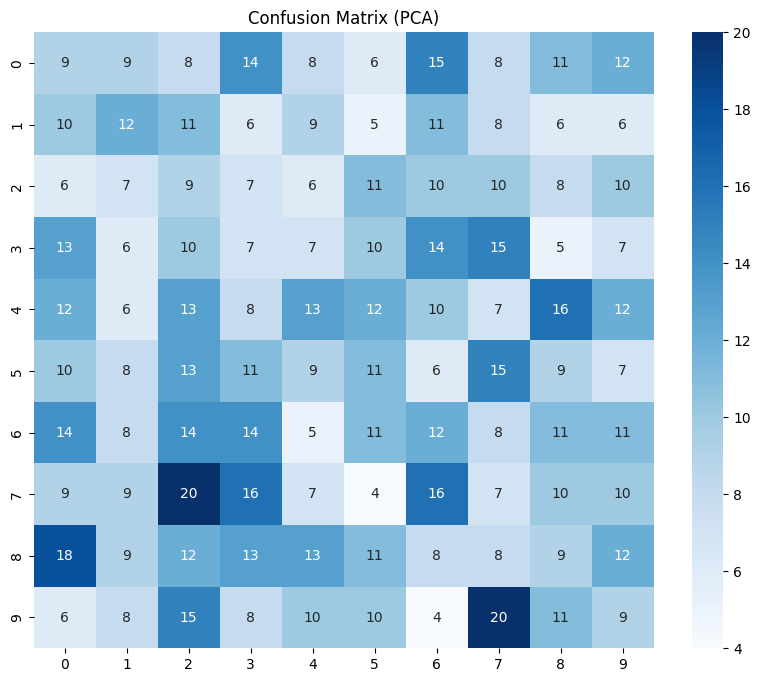

In [ ]:
# cm = confusion_matrix(y_test, y_pred_pca)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix (PCA)")
# plt.show()

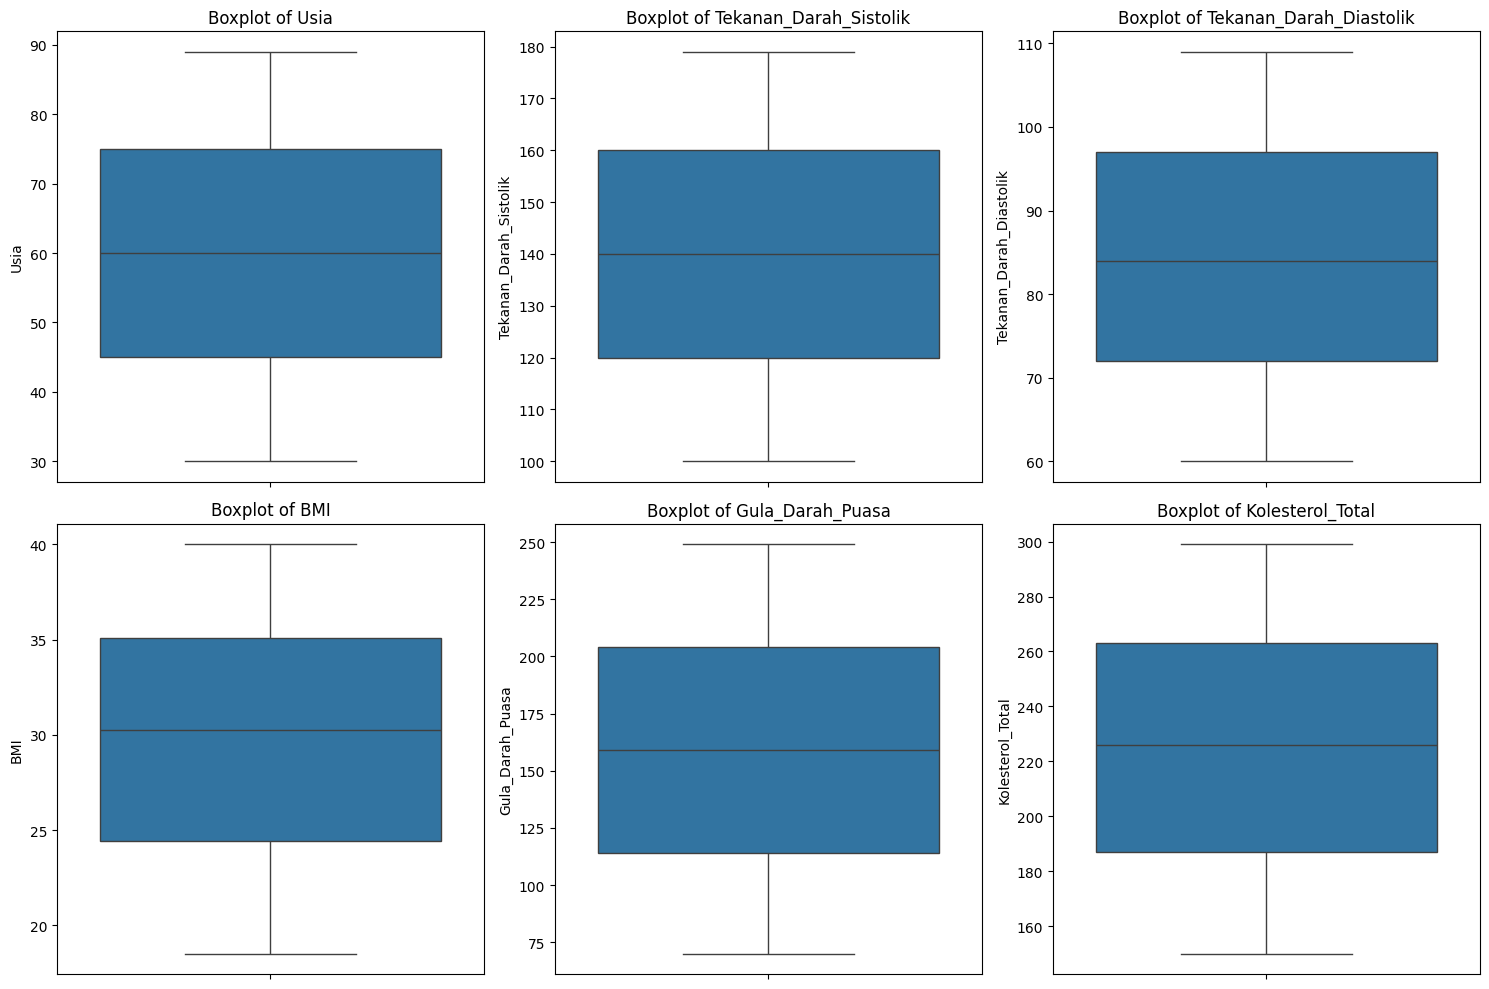

In [ ]:
# 7. Visualisasi Boxplot untuk Analisis Outlier
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_cols, 1):
#     plt.subplot(2, 3, i)
#     sns.boxplot(data[col])
#     plt.title(f'Boxplot of {col}')
# plt.tight_layout()
# plt.show()


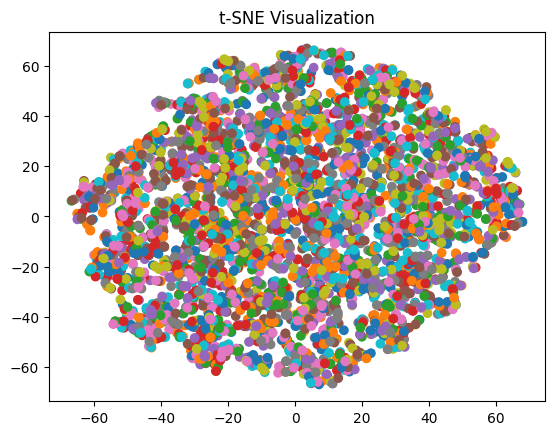

In [ ]:
# 8. Alternatif Reduksi Dimensi dengan t-SNE (Opsional)
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_train_res)

# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_res, cmap='tab10')
# plt.title('t-SNE Visualization')
# plt.show()

In [ ]:
# le = LabelEncoder()
# data['Jenis_Kelamin'] = le.fit_transform(data['Jenis_Kelamin'])
# data['Merokok'] = le.fit_transform(data['Merokok'])
# data['Riwayat_Keluarga'] = le.fit_transform(data['Riwayat_Keluarga'])
# data['Penyakit_Kronis'] = le.fit_transform(data['Penyakit_Kronis'])

In [ ]:
# X = data.drop('Penyakit_Kronis', axis=1)
# y = data['Penyakit_Kronis']

In [ ]:
# from scipy.stats.mstats import winsorize
# for col in numerical_cols:
#     X_train[col] = winsorize(X_train[col], limits=[0.05, 0.05])
#     X_test[col] = winsorize(X_test[col], limits=[0.05, 0.05])

In [ ]:
# numerical_cols = ['Usia', 'Tekanan_Darah_Sistolik', 'Tekanan_Darah_Diastolik', 'BMI', 'Gula_Darah_Puasa', 'Kolesterol_Total']

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
# for col in numerical_cols:
#     X[col] = pd.to_numeric(X[col], errors='coerce')  
#     X[col] = X[col].fillna(X[col].mean())

In [ ]:
# for col in numerical_cols:
#     X[col] = pd.to_numeric(X[col], errors='coerce') 
#     X[col] = X[col].fillna(X[col].mean())

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Statistik Deskriptif:
              Usia  Jenis_Kelamin  Tekanan_Darah_Sistolik  \
count  5000.00000    5000.000000             5000.000000   
mean     59.70120       0.502000              140.112400   
std      17.26688       0.500046               23.275294   
min      30.00000       0.000000              100.000000   
25%      45.00000       0.000000              120.000000   
50%      60.00000       1.000000              140.000000   
75%      75.00000       1.000000              160.000000   
max      89.00000       1.000000              179.000000   

       Tekanan_Darah_Diastolik          BMI  Gula_Darah_Puasa  \
count              5000.000000  5000.000000       5000.000000   
mean                 84.307400    29.748220        159.038600   
std                  14.424386     5.805567         51.956769   
min                  60.000000    18.510000         70.000000   
25%                  72.000000    25.190000        114.000000   
50%                  84.000000    29.748220   

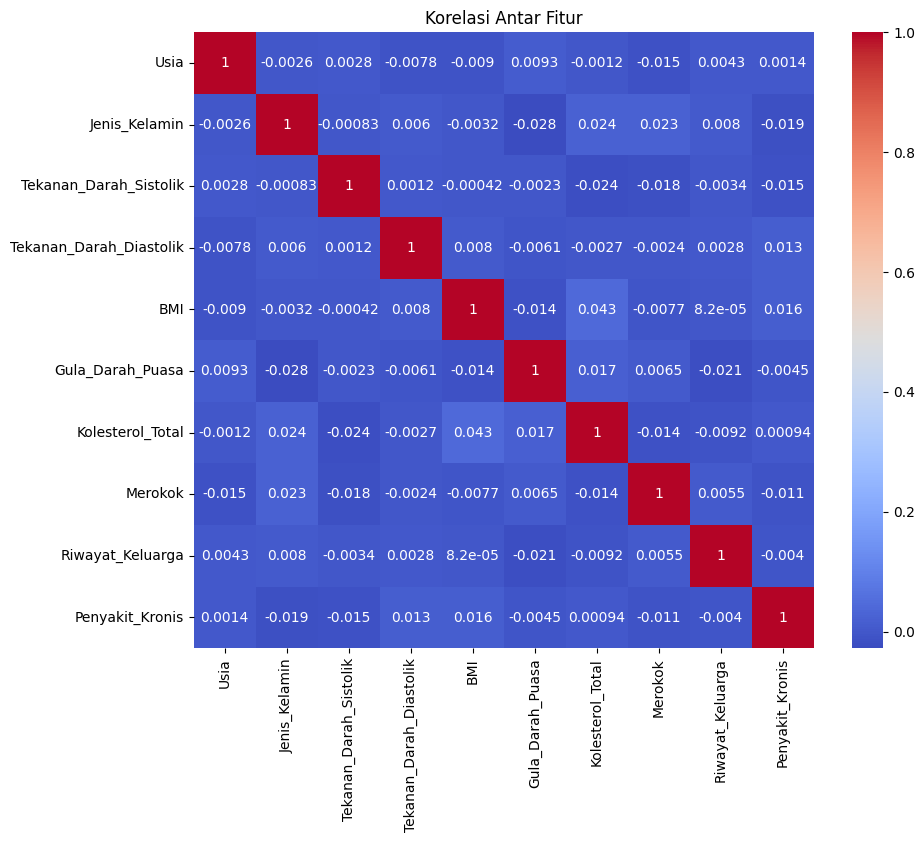

In [ ]:
# 2. Analisis empiris
# print("Statistik Deskriptif:\n", data.describe())
# plt.figure(figsize=(10, 8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.title("Korelasi Antar Fitur")
# plt.show()

In [ ]:
# 3. PCA
# pca = PCA(n_components=0.95)
# X_pca = pca.fit_transform(X)
# print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# print("Jumlah Komponen:", pca.n_components_)

Explained Variance Ratio: [0.15690805 0.15290073 0.14906032 0.14852902 0.14773812 0.14098486
 0.03741961 0.03610421]
Jumlah Komponen: 8


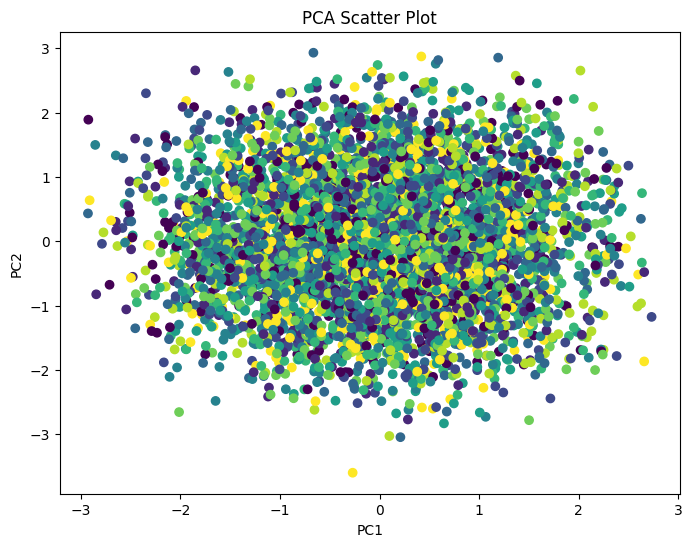

In [ ]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# if pca.n_components_ >= 2:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
#     plt.xlabel('PC1')
#     plt.ylabel('PC2')
#     plt.title('PCA Scatter Plot')
#     plt.show()

In [ ]:
# 4. KNN pada data asli
# best_k = 1
# best_acc = 0
# for k in range(1, 11):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     if acc > best_acc:
#         best_acc = acc
#         best_k = k
# print(f"K Optimal untuk Data Asli: {best_k}, Akurasi: {best_acc}")

# knn = KNeighborsClassifier(n_neighbors=best_k)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# print("Evaluasi KNN pada Data Asli:\n", classification_report(y_test, y_pred))

K Optimal untuk Data Asli: 9, Akurasi: 0.1
Evaluasi KNN pada Data Asli:
               precision    recall  f1-score   support

           0       0.08      0.14      0.10       100
           1       0.12      0.20      0.15        84
           2       0.08      0.13      0.10        84
           3       0.08      0.11      0.09        94
           4       0.11      0.09      0.10       109
           5       0.16      0.14      0.15        99
           6       0.16      0.10      0.12       108
           7       0.03      0.02      0.02       108
           8       0.12      0.06      0.08       113
           9       0.09      0.04      0.05       101

    accuracy                           0.10      1000
   macro avg       0.10      0.10      0.10      1000
weighted avg       0.10      0.10      0.10      1000



In [ ]:
# 5. KNN pada data PCA
# knn_pca = KNeighborsClassifier(n_neighbors=best_k)
# knn_pca.fit(X_train_pca, y_train_pca)
# y_pred_pca = knn_pca.predict(X_test_pca)
# acc_pca = accuracy_score(y_test_pca, y_pred_pca)
# print(f"Akurasi Data PCA: {acc_pca}")
# print("Evaluasi KNN pada Data PCA:\n", classification_report(y_test_pca, y_pred_pca))

Akurasi Data PCA: 0.103
Evaluasi KNN pada Data PCA:
               precision    recall  f1-score   support

           0       0.06      0.11      0.08       100
           1       0.11      0.18      0.13        84
           2       0.11      0.21      0.15        84
           3       0.08      0.11      0.09        94
           4       0.13      0.10      0.11       109
           5       0.13      0.11      0.12        99
           6       0.12      0.07      0.09       108
           7       0.08      0.06      0.07       108
           8       0.17      0.08      0.11       113
           9       0.11      0.04      0.06       101

    accuracy                           0.10      1000
   macro avg       0.11      0.11      0.10      1000
weighted avg       0.11      0.10      0.10      1000



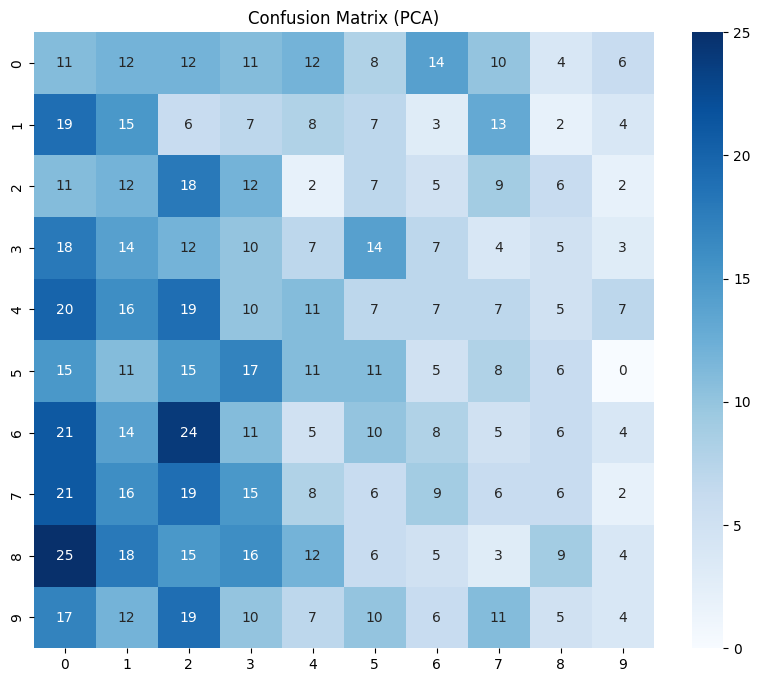

In [ ]:
# 6. Visualisasi confusion matrix
# cm = confusion_matrix(y_test_pca, y_pred_pca)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix (PCA)")
# plt.show()

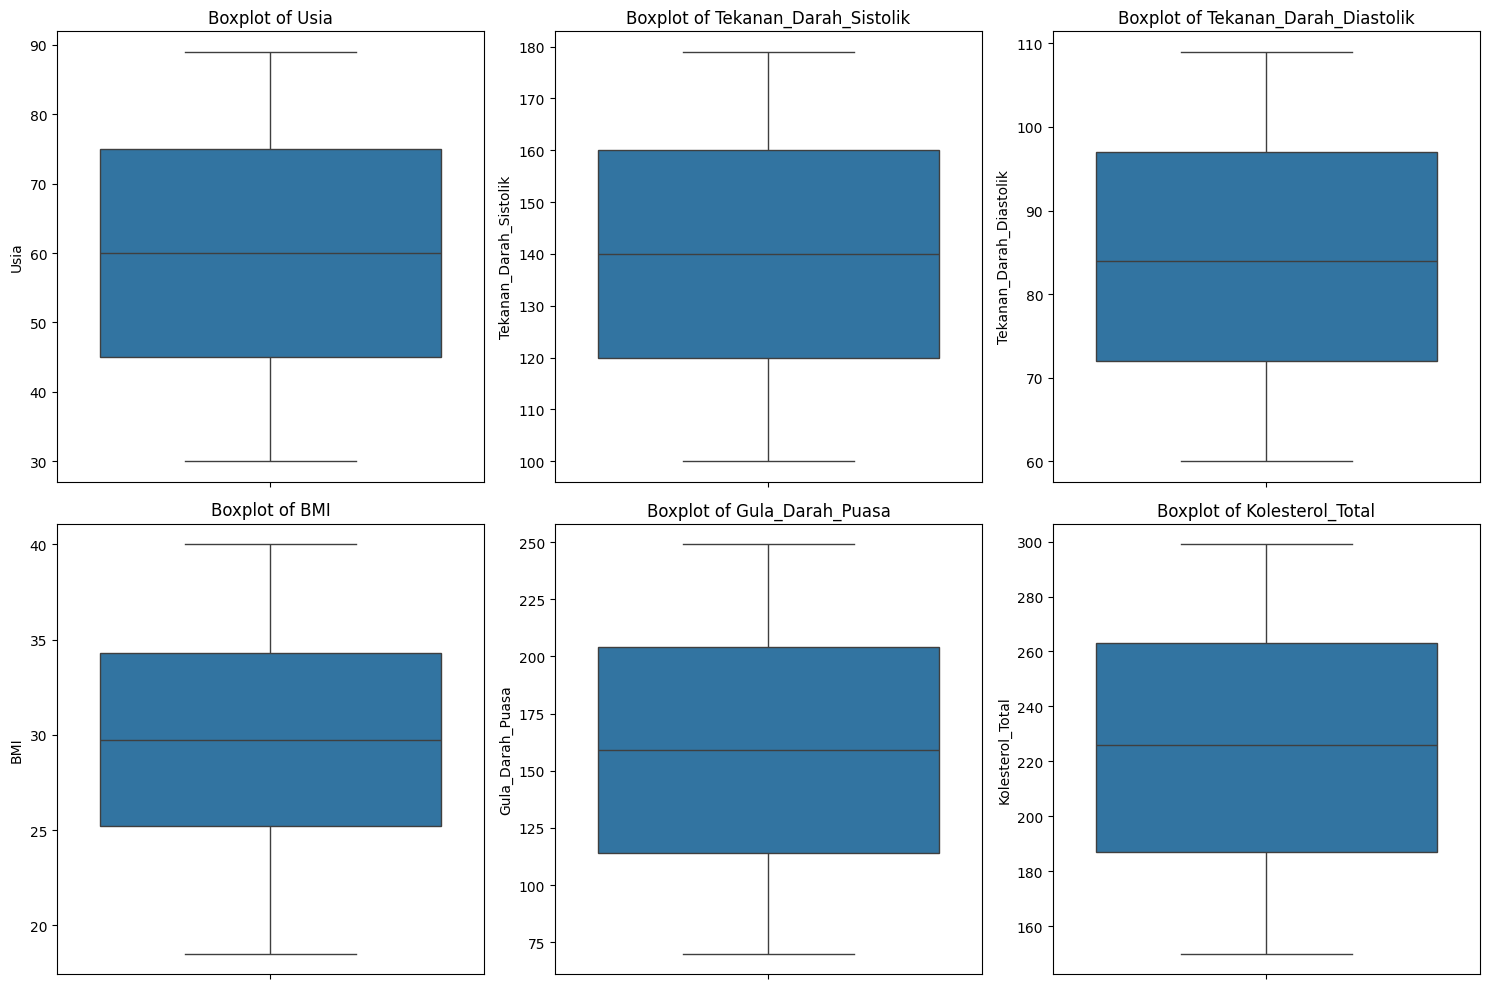

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(15, 10))  
# for i, col in enumerate(numerical_cols, 1):
#     plt.subplot(2, 3, i)  
#     sns.boxplot(data[col])  
#     plt.title(f'Boxplot of {col}') 
# plt.tight_layout() 
# plt.show()  